In [3]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark, geom_line, theme, geom_histogram, geom_density
import pandas as pd

In [4]:
def posterior_grid_approx(points=5, success=6, tosses=9):
    """
    success ~ Binomial(n,p)
    p ~ Uniform(0,1)
    """
    grid = np.linspace(0, 1, points)
    prior = 1
    likelihood = stats.binom.pmf(success, tosses, grid)
    posterior = likelihood*prior / sum(likelihood) 
    return pd.DataFrame({'param_value':grid, 'p':posterior})

In [5]:
posterior = posterior_grid_approx(points=50, success=6, tosses=9)

In [6]:
samples = np.random.choice(posterior.param_value, p=posterior.p, size=int(1e4), replace=True)

In [7]:
sum(samples < 0.5)/len(samples)

0.1718

In [8]:
sum((samples > 0.5) & (samples < 0.75))/len(samples)

0.5936

Compatibility interval: two parameters whose interval contains certain amount of probability mass

In [9]:
np.quantile(samples, 0.8)

0.7551020408163265

Middle 80% interval

In [10]:
np.quantile(samples, (0.1, 0.9))

array([0.44897959, 0.81632653])

Percentile intervals: assign equal probability mass to each tail

Highest posterior density intervals

Example in which HPDI and Percentile Intervals differ in terms of supporting parameters inference

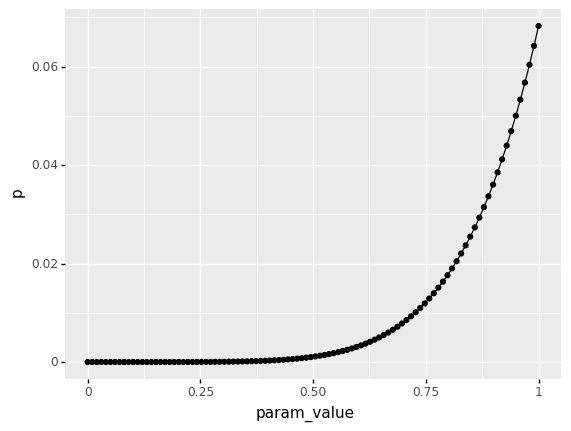

<ggplot: (274897683)>

In [11]:
posterior_right_tail = posterior_grid_approx(points=100, success=6, tosses=6)
(ggplot(posterior_right_tail, aes(x='param_value', y='p'))
+ geom_line()
+ geom_point())

In [12]:
samples = np.random.choice(posterior_right_tail.param_value, p=posterior_right_tail.p, size=int(1e4), replace=True)


In [13]:
np.mean(samples)

0.8791010101010103

In [14]:
np.median(samples)

0.9090909090909092

In [15]:
stats.mode(samples)[0]

array([1.])

# Simulation

In [16]:
true_proportion_of_water = 0.7

In [26]:
stats.binom(p=0.7, n=2).rvs(10)

array([2, 1, 1, 1, 2, 2, 0, 2, 1, 0])

In [28]:
stats.binom(p=0.7, n=2).pmf([0,1,2])

array([0.09, 0.42, 0.49])

In [29]:
dummy_w = stats.binom(p=0.7, n=2).rvs(100000)

In [35]:
[sum(dummy_w==i)/len(dummy_w) for i in (0,1,2)]

[0.09099, 0.42093, 0.48808]

# End of chapter problems

They are in Notebook 2